# Problem 1

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from scipy.stats import skew
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [4]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## a) Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?

In [5]:
LotArea = pd.DataFrame(data["LotArea"])
LotArea.head()

,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260


In [6]:
GrLivArea = pd.DataFrame(data["GrLivArea"])
GrLivArea.head()

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198


In [7]:
TotalBsmtSF = pd.DataFrame(data["TotalBsmtSF"])
TotalBsmtSF.head()

,TotalBsmtSF
0,856
1,1262
2,920
3,756
4,1145


In [8]:
GarageArea = pd.DataFrame(data["GarageArea"])
GarageArea.head()

,GarageArea
0,548
1,460
2,608
3,642
4,836


In [9]:
def count_outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    count = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
    return count

LotArea    69
dtype: int64

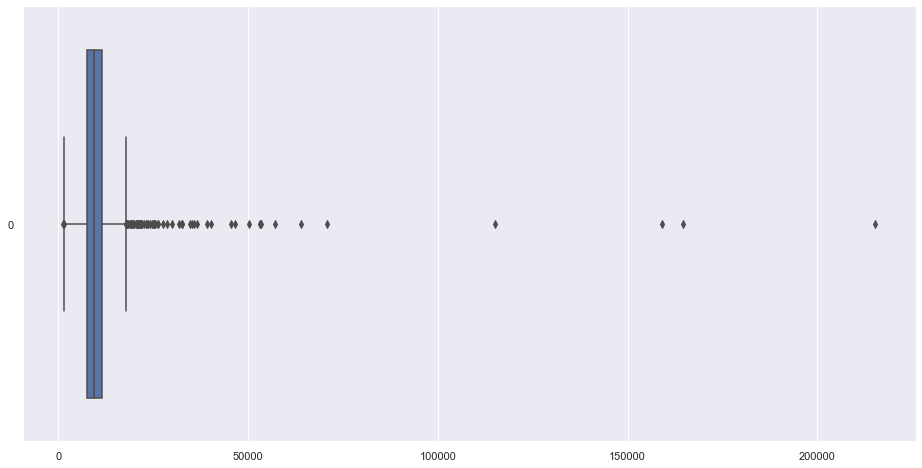

In [10]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = [LotArea], orient = "h")
count_outlier(LotArea)

GrLivArea    31
dtype: int64

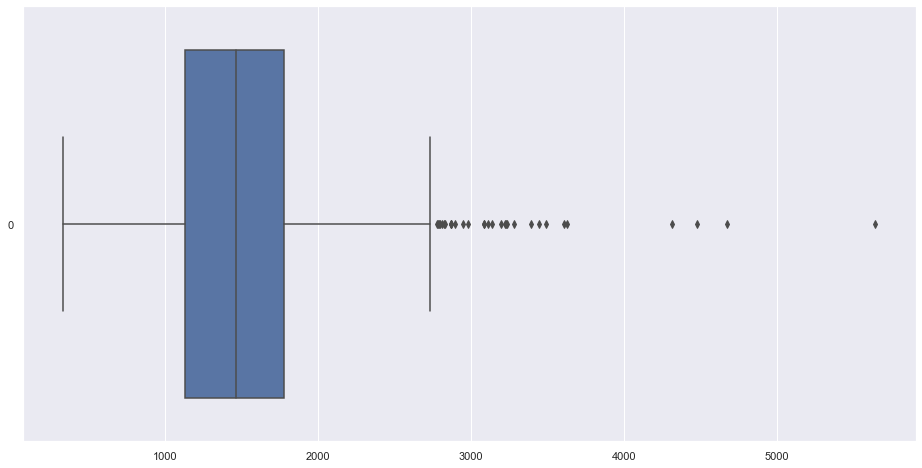

In [11]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = [GrLivArea], orient = "h")
count_outlier(GrLivArea)

TotalBsmtSF    61
dtype: int64

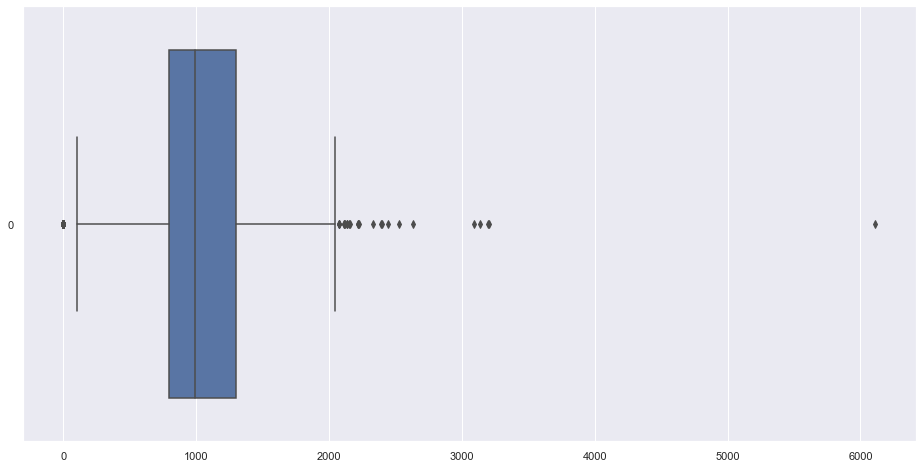

In [12]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = [TotalBsmtSF], orient = "h")
count_outlier(TotalBsmtSF)

GarageArea    21
dtype: int64

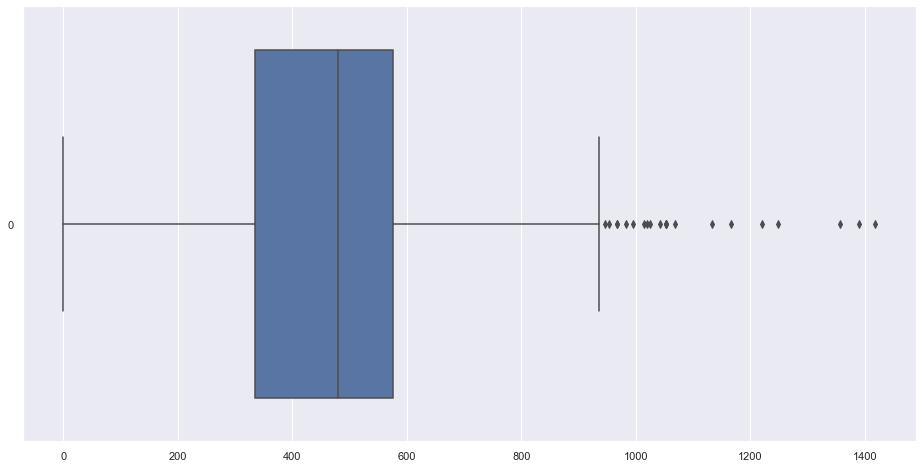

In [13]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = [GarageArea], orient = "h")
count_outlier(GarageArea)

## Answer

LotArea has the maximum number of outliers as per box-plot. It has 69 outliers.

***

## b) Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?

In [14]:
#absolutely useless in this case since I already imported and used skew() but just to check
def skewness(data):
    mean = data.mean()
    median = data.median()
    std = data.std()
    skewness = (abs(mean-median))*3/std
    return skewness

In [15]:
skewness_LotArea = LotArea.skew()
print(skewness_LotArea)
skew(LotArea)

LotArea    12.207688
dtype: float64


array([12.19514213])

In [19]:
skewness_GrLivArea = GrLivArea.skew()
print(skewness_GrLivArea)
skew(GrLivArea)

GrLivArea    1.36656
dtype: float64


array([1.36515595])

In [20]:
skewness_GarageArea = GarageArea.skew()
print(skewness_GarageArea)
skew(GarageArea)

GarageArea    0.179981
dtype: float64


array([0.17979594])

In [21]:
skewness_TotalBsmtSF = TotalBsmtSF.skew()
print(skewness_TotalBsmtSF)
skew(TotalBsmtSF)

TotalBsmtSF    1.524255
dtype: float64


array([1.52268809])

## Answer

LotArea is the most skewed from a regular normal distribution. The skew is positive.

***

## c) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

In [25]:
dataDF = pd.DataFrame(data[["LotArea", "GrLivArea", "GarageArea", "TotalBsmtSF", "SalePrice"]])
dataDF.head()

,LotArea,GrLivArea,GarageArea,TotalBsmtSF,SalePrice
0,8450,1710,548,856,208500
1,9600,1262,460,1262,181500
2,11250,1786,608,920,223500
3,9550,1717,642,756,140000
4,14260,2198,836,1145,250000


In [26]:
dataDF.corr()

,LotArea,GrLivArea,GarageArea,TotalBsmtSF,SalePrice
LotArea,1.000000,0.263116,0.180403,0.260833,0.263843
GrLivArea,0.263116,1.000000,0.468997,0.454868,0.708624
GarageArea,0.180403,0.468997,1.000000,0.486665,0.623431
TotalBsmtSF,0.260833,0.454868,0.486665,1.000000,0.613581
SalePrice,0.263843,0.708624,0.623431,0.613581,1.000000


<AxesSubplot:>

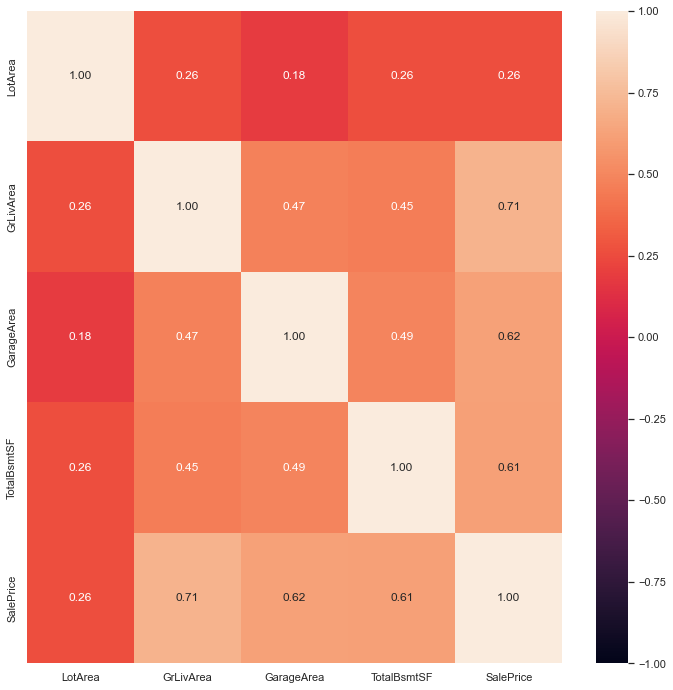

In [27]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(dataDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

## Answer

Top 2 variables that I think will help us the most in predicting ‘SalePrice’ of houses in this data: GrLivArea and GarageArea.

***

# Problem 2

## a) Which of these variables has the highest number of levels? Which of the levels has the highest number of houses?

In [31]:
print("Number of levels of MSSubClass:", len(data["MSSubClass"].unique()))
print("Number of levels of Neighborhood:", len(data["Neighborhood"].unique()))
print("Number of levels of BldgType:", len(data["BldgType"].unique()))
print("Number of levels of OverallQual:", len(data["OverallQual"].unique()))

Number of levels of MSSubClass: 15
Number of levels of Neighborhood: 25
Number of levels of BldgType: 5
Number of levels of OverallQual: 10


In [42]:
grouped = data.groupby("Neighborhood").agg(["count"])
print(grouped)

                Id MSSubClass MSZoning LotFrontage LotArea Street Alley  \
             count      count    count       count   count  count count   
Neighborhood                                                              
Blmngtn         17         17       17          14      17     17     0   
Blueste          2          2        2           2       2      2     0   
BrDale          16         16       16          16      16     16     0   
BrkSide         58         58       58          51      58     58     5   
ClearCr         28         28       28          13      28     28     0   
CollgCr        150        150      150         126     150    150     0   
Crawfor         51         51       51          41      51     51     1   
Edwards        100        100      100          92     100    100     6   
Gilbert         79         79       79          49      79     79     0   
IDOTRR          37         37       37          34      37     37     7   
MeadowV         17       

## Answer

Neighborhood has the highest number of levels. NAmes has the highest number of houses.

***

## b) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

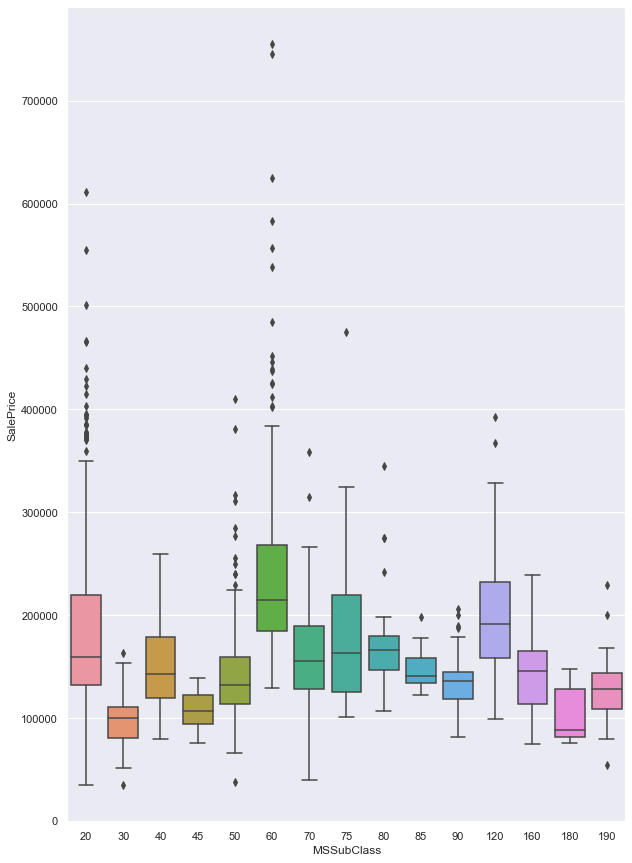

In [63]:
plt.figure(figsize=(10,15))
sb.boxplot(data=data, x='MSSubClass',y='SalePrice')

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

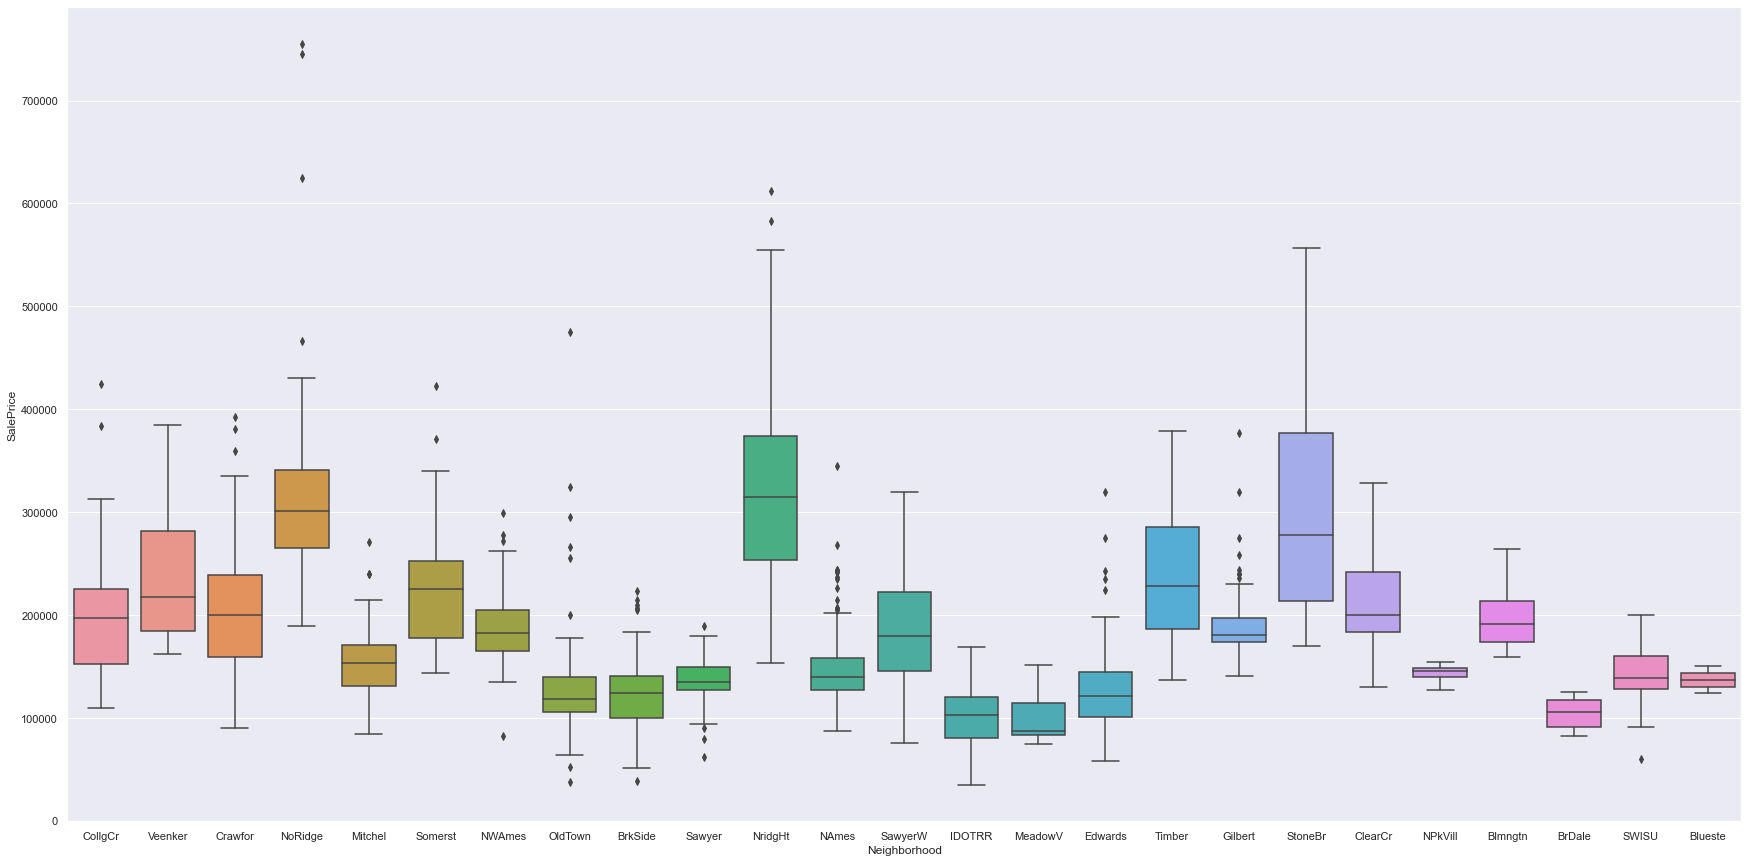

In [80]:
plt.figure(figsize=(30,15))
sb.boxplot(data=data, x='Neighborhood',y='SalePrice')

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

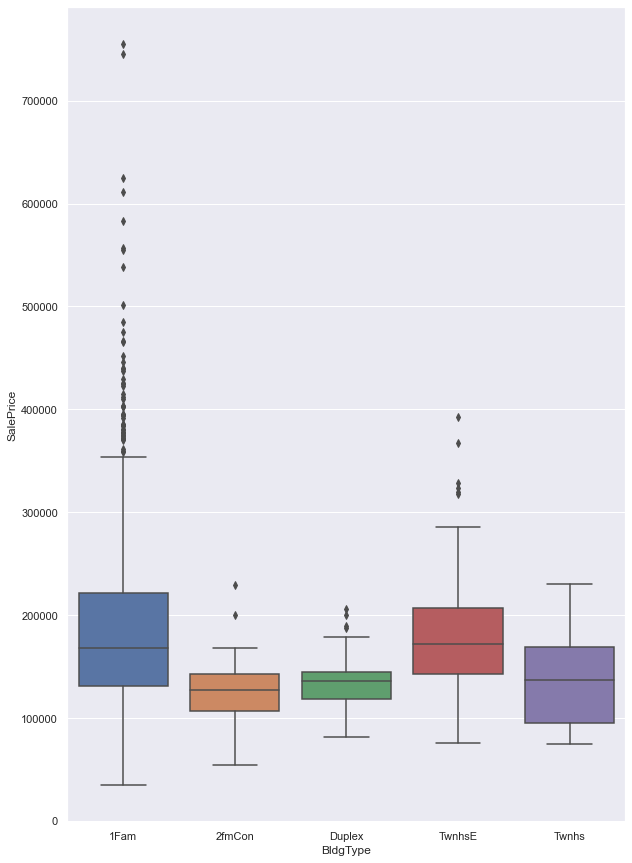

In [64]:
plt.figure(figsize=(10,15))
sb.boxplot(data=data, x='BldgType',y='SalePrice')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

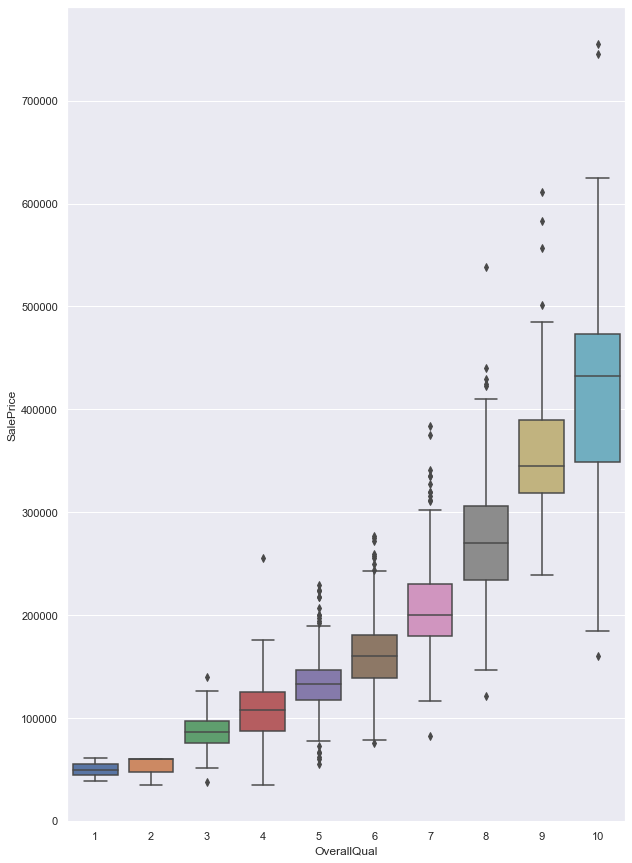

In [74]:
plt.figure(figsize=(10,15))
sb.boxplot(data=data, x='OverallQual',y='SalePrice')

## Answer

Neighborhood and OverallQual are the top two variables that I think will help us the most in predicting ‘SalePrice’ of houses in this data. 
<br>There is an upward trend in SalePrice with increasing OverallQual.
<br>There are clear preferences for certain neighborhoods and against other neighborhoods (with difference in medians of up to 200000).

***

# Problem 3

## b) Does the SalePrice of a house get affected by how recently it got Remodeled? Justify your answer using EDA.

In [103]:
df = pd.DataFrame(data[["YearRemodAdd","SalePrice"]])
df.head()

,YearRemodAdd,SalePrice
0,2003,208500
1,1976,181500
2,2002,223500
3,1970,140000
4,2000,250000


<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

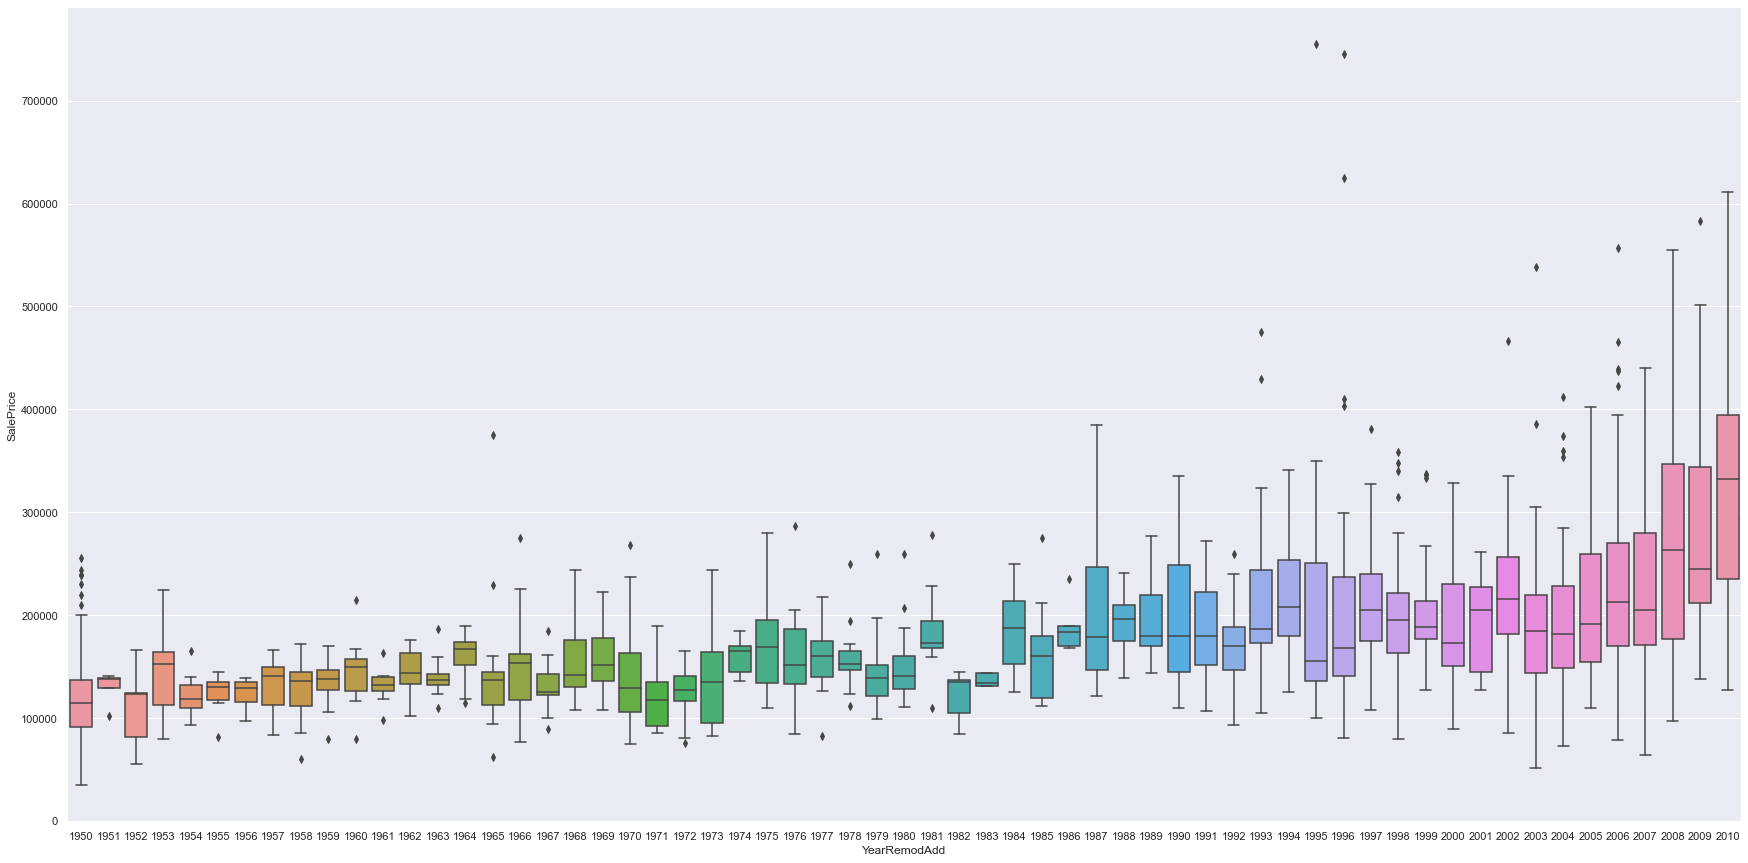

In [111]:
plt.figure(figsize=(30,15))
sb.boxplot(data=data, x='YearRemodAdd',y='SalePrice')